In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
# plt.style.use('dark_background')
from pydmd import DMD

In [69]:
import pandas as pd
import os
path = '../tests/test_createROM_V'
filename = 'history.csv'

variables = ['time','x','y']
parameters = ['x_start','y_start','alpha','beta','gamma','delta']

df = pd.read_csv(os.path.join(path,filename))
df_ex = pd.read_csv(os.path.join(path,df['filename'][0]))
ntime = len(df_ex['time'])
files = df['filename'].to_list()
nFiles = len(files)
nV = len(variables)+len(parameters)

In [70]:
X = np.empty((nFiles,nV,ntime))
for i, file in enumerate(files):
    df_i = pd.read_csv(os.path.join(path,file))
    df_i.head()
    for j, varV in enumerate(variables):
        X[i,j,:] = df_i[varV].values
    for varP in parameters:
        j = j+1
        X[i,j,:] = np.ones(ntime)*df[varP][i]
    

In [74]:
# Save csv with all variables and parameters at all time steps
pathSave = os.path.join(path,'data')
if not os.path.isdir(pathSave):
    os.makedirs(pathSave)
        
for i, file in enumerate(files):
    data = X[i,:,:].T
    df_save = pd.DataFrame(data=data, columns=variables+parameters)
    df_save.to_csv(os.path.join(pathSave,file))

In [2]:
def f1(x,t): 
    return 1./np.cosh(x+3)*np.exp(2.3j*t)

def f2(x,t):
    return 2./np.cosh(x)*np.tanh(x)*np.exp(2.8j*t)

x = np.linspace(-5, 5, 65)
t = np.linspace(0, 4*np.pi, 129)

xgrid, tgrid = np.meshgrid(x, t)

X1 = f1(xgrid, tgrid)
X2 = f2(xgrid, tgrid)
X = X1 + X2

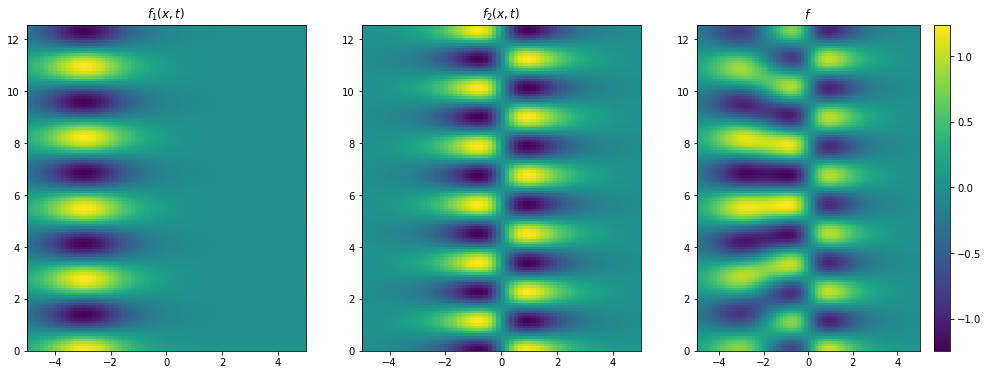

In [3]:
titles = ['$f_1(x,t)$', '$f_2(x,t)$', '$f$']
data = [X1, X2, X]

fig = plt.figure(figsize=(17, 6))
for n, title, d in zip(range(131, 134), titles, data):
    plt.subplot(n)
    plt.pcolor(xgrid, tgrid, d.real)
    plt.title(title)
plt.colorbar()
plt.show()

In [62]:
dmd = DMD(svd_rank=2)
dmd.fit(X)

Eigenvalue 1.001624392049384: distance from unit circle 0.001624392049383916
Eigenvalue 0.9970051964598412: distance from unit circle 0.002994803540158797


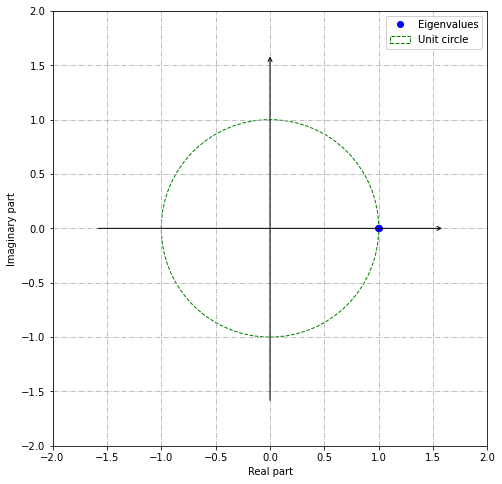

In [60]:
for eig in dmd.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(np.sqrt(eig.imag**2+eig.real**2) - 1)))

dmd.plot_eigs(show_axes=True, show_unit_circle=True)

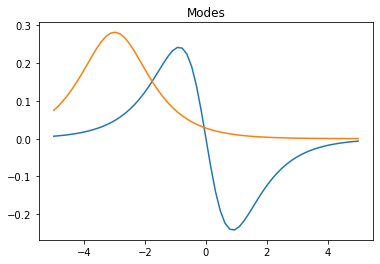

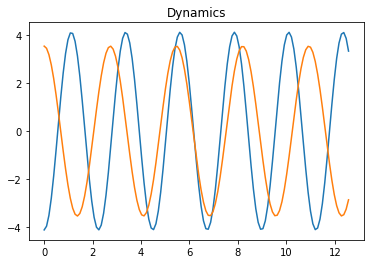

In [6]:
for mode in dmd.modes.T:
    plt.plot(x, mode.real)
    plt.title('Modes')
plt.show()

for dynamic in dmd.dynamics:
    plt.plot(t, dynamic.real)
    plt.title('Dynamics')
plt.show()

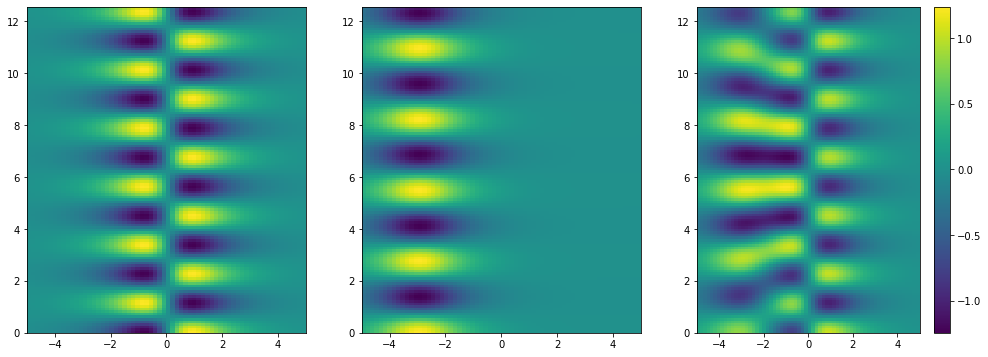

In [7]:
fig = plt.figure(figsize=(17,6))

for n, mode, dynamic in zip(range(131, 133), dmd.modes.T, dmd.dynamics):
    plt.subplot(n)
    plt.pcolor(xgrid, tgrid, (mode.reshape(-1, 1).dot(dynamic.reshape(1, -1))).real.T)
    
plt.subplot(133)
plt.pcolor(xgrid, tgrid, dmd.reconstructed_data.T.real)
plt.colorbar()

plt.show()

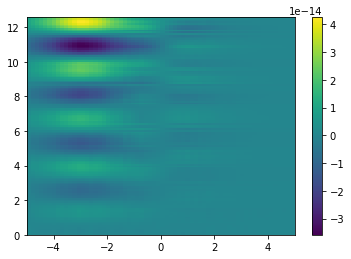

In [8]:
plt.pcolor(xgrid, tgrid, (X-dmd.reconstructed_data.T).real)
fig = plt.colorbar()

In [64]:
import numpy as np
import scipy
import scipy.integrate

from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
from pydmd import DMD

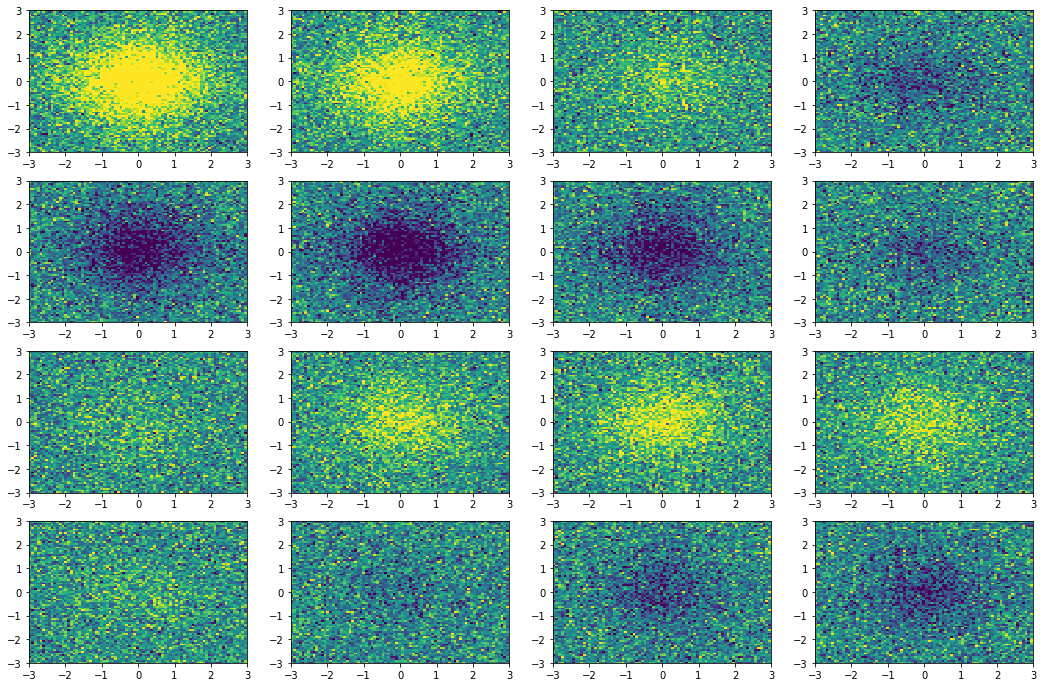

In [65]:
x1 = np.linspace(-3, 3, 80)
x2 = np.linspace(-3, 3, 80)
x1grid, x2grid = np.meshgrid(x1, x2)

time = np.linspace(0, 6, 16)

data = [2/np.cosh(x1grid)/np.cosh(x2grid)*(1.2j**-t) for t in time]
noise = [np.random.normal(0.0, 0.4, size=x1grid.shape) for t in time]

snapshots = [d+n for d,n in zip(data, noise)]

fig = plt.figure(figsize=(18,12))
for id_subplot, snapshot in enumerate(snapshots, start=1):
    plt.subplot(4, 4, id_subplot)
    plt.pcolor(x1grid, x2grid, snapshot.real, vmin=-1, vmax=1)

In [66]:
np.shape(data)

(16, 80, 80)